In [6]:
import os
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
import imghdr

C:\Users\abhij\AppData\Local\Temp\ipykernel_19528\2555265036.py:6: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = "Data"
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for img_dir in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,img_dir)):
        image_path = os.path.join(data_dir,img_dir,image)
        try:
            img = cv.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image have not a suitable type:{}".format(image))
                os.remove(image_path)
        except:
            print("Image can not be read:{}".format(image))
            os.remove(image_path)

In [9]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 207 files belonging to 2 classes.


In [10]:
data_arr = data.as_numpy_iterator()
batch = data_arr.next()


In [11]:
img_shape = (batch[0][0].shape)
img_shape

(256, 256, 3)

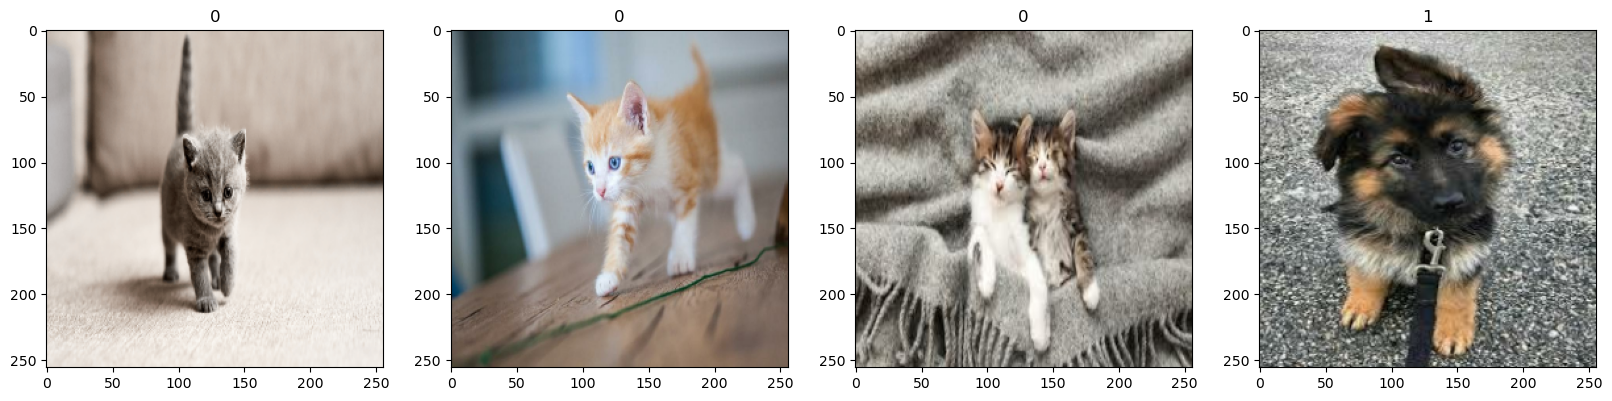

In [12]:
fig, ax = plt.subplots(1,4,figsize = (20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data = data.map(lambda x,y:(x/255,y))

In [14]:
train_size = int(len(data)*.7)
vald_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1
train_size,vald_size,test_size


(4, 2, 1)

In [15]:
train = data.take(train_size)
vald = data.skip(train_size).take(vald_size)
test = data.skip(vald_size + train_size).take(test_size)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [17]:
model = Sequential()

model.add(Conv2D(16,(3,3),1,activation="relu",input_shape = img_shape))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))


C:\Users\abhij\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile("adam",loss = tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
logdir = 'logs'

In [21]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [22]:
hist = model.fit(train, epochs=20, validation_data=vald, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 677ms/step - accuracy: 0.4844 - loss: 1.0585 - val_accuracy: 0.5312 - val_loss: 0.6935
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 573ms/step - accuracy: 0.5844 - loss: 0.6850 - val_accuracy: 0.5469 - val_loss: 0.6760
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 537ms/step - accuracy: 0.5490 - loss: 0.6896 - val_accuracy: 0.5625 - val_loss: 0.6765
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 590ms/step - accuracy: 0.6625 - loss: 0.6740 - val_accuracy: 0.5000 - val_loss: 0.6848
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 557ms/step - accuracy: 0.5208 - loss: 0.6813 - val_accuracy: 0.7812 - val_loss: 0.6690
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 569ms/step - accuracy: 0.7740 - loss: 0.6645 - val_accuracy: 0.8438 - val_loss: 0.6535
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 602ms/step - accuracy: 0.7906 - loss: 0.6423 - val_accuracy: 0.6719 - val_loss: 0.6054
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 626ms/step - accuracy: 0.5781 - loss: 0.6181 - val_accuracy: 0.7969 - val_loss:

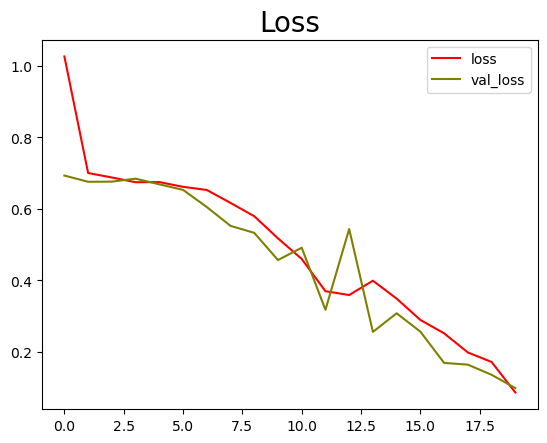

In [23]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'red',label = 'loss')
plt.plot(hist.history['val_loss'], color = 'olive',label = 'val_loss')
plt.title('Loss',fontsize = 20)
plt.legend(loc = 'upper right')
plt.show()

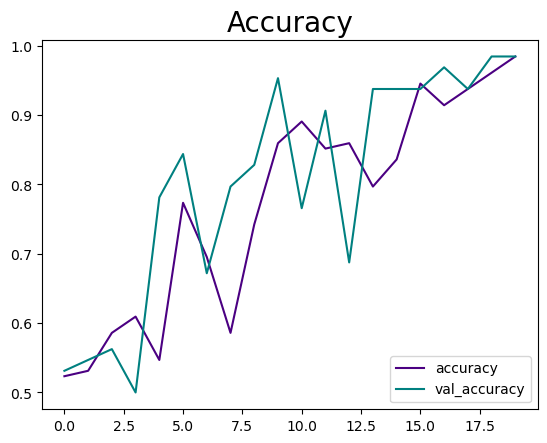

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'indigo',label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'teal',label = 'val_accuracy')
plt.title('Accuracy',fontsize = 20)
plt.legend(loc = 'lower right')
plt.show()

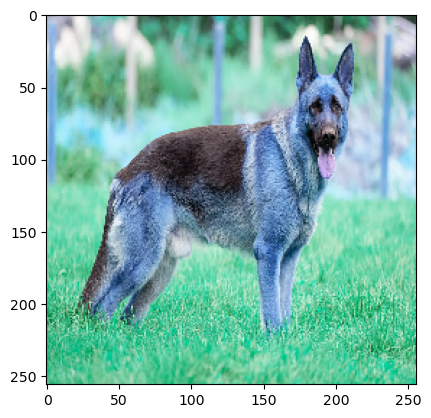

In [25]:
img = cv.imread('image2.png')
img = tf.image.resize(img,(256,256))
plt.imshow(img.numpy().astype(int))

In [26]:
yhat = model.predict(np.expand_dims(img/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [27]:
yhat

array([[0.0595625]], dtype=float32)

In [28]:
if yhat > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Cat


In [29]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc =BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


In [36]:
print(f'Precision:{pre.result()},Recall:{re.result()},Accuracy:{acc.result()}')

Precision:1.0,Recall:1.0,Accuracy:1.0
